<a href="https://colab.research.google.com/github/srv/opencosmos/blob/main/opencosmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## GITHUB AND DRIVE MOUNT ##

if "setup" not in globals():
  !git clone https://@github.com/srv/opencosmos.git
  from google.colab import drive
  drive.mount('/content/drive')
  setup = True
# drive.flush_and_unmount()

Cloning into 'opencosmos'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 133 (delta 70), reused 43 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (133/133), 24.17 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Mounted at /content/drive


In [2]:
## INSTALLS AND IMPORTS ##

# use % for terminal commands (e.g. %ls)

!pip install matplotlib
!pip install rasterio
import rasterio
import rasterio.plot
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 82.5 MB/s eta 0:00:00


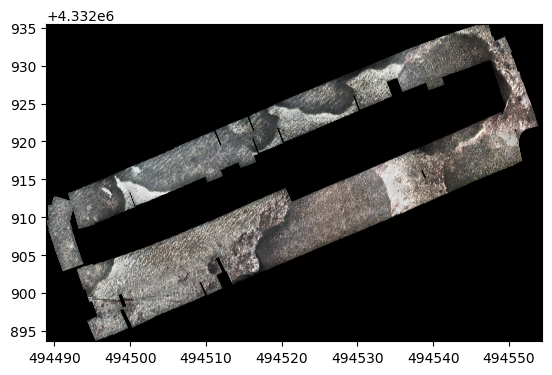

mosaic shape: (6948, 10757)
mosaic crs: EPSG:25831


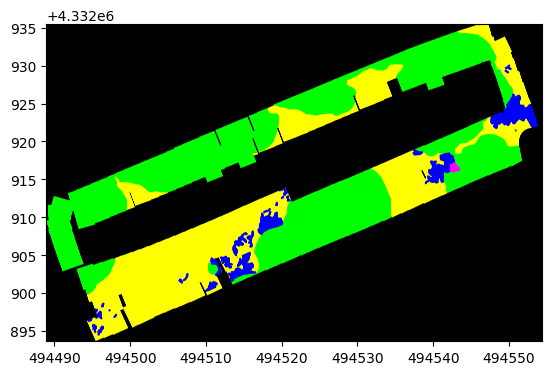

mosaic_seg shape: (6948, 10757)
mosaic_seg crs: EPSG:25831


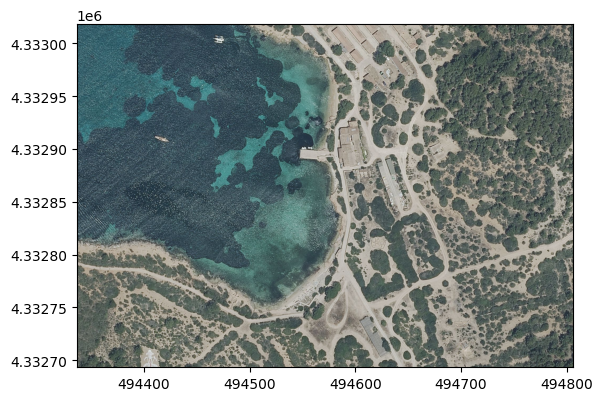

ortofoto shape: (1299, 1878)
ortofoto crs: EPSG:25831


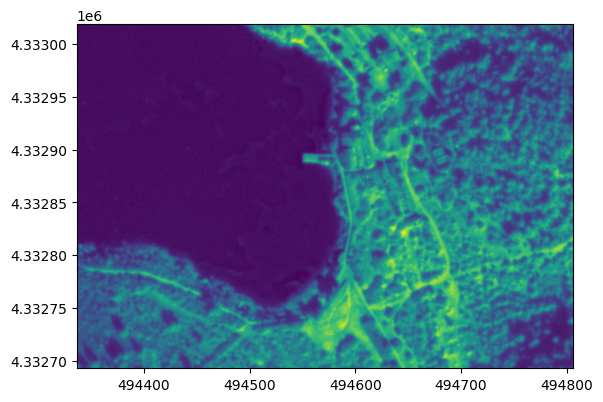

geosat shape: (434, 626)
geosat crs: EPSG:25831


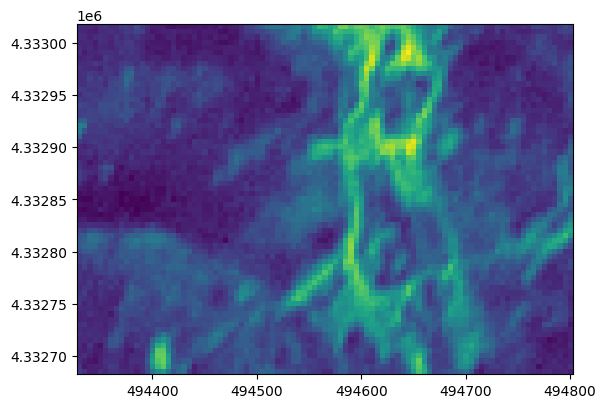

platero shape: (67, 95)
platero crs: EPSG:25831


In [3]:
## LOAD TIFS ##

# --- Mosaic ---
mosaic_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_05_02_2025.tif"
mosaic_tif = rasterio.open(mosaic_path)
rasterio.plot.show(mosaic_tif)
print("mosaic shape:", mosaic_tif.shape)
print("mosaic crs:", mosaic_tif.crs)

# --- Mosaic segmentation ---
mosaic_seg_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_seg_05_02_2025.tif"
mosaic_seg_tif = rasterio.open(mosaic_seg_path)
rasterio.plot.show(mosaic_seg_tif)
print("mosaic_seg shape:", mosaic_seg_tif.shape)
print("mosaic_seg crs:", mosaic_seg_tif.crs)

# --- Ortofoto ---
ortofoto_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/clip_ortofoto_Cabrera_2024.tif"
ortofoto_tif = rasterio.open(ortofoto_path)
rasterio.plot.show(ortofoto_tif)
print("ortofoto shape:", ortofoto_tif.shape)
print("ortofoto crs:", ortofoto_tif.crs)

# --- Geosat ---
geosat_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/Clip_Geosat_Cabrera_20230204.tif"
geosat_tif = rasterio.open(geosat_path)
rasterio.plot.show(geosat_tif)
print("geosat shape:", geosat_tif.shape)
print("geosat crs:", geosat_tif.crs)

# --- Platero ---
platero_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/Clip_Platero_L2W_20250809_composite.tif"
platero_tif = rasterio.open(platero_path)
rasterio.plot.show(platero_tif)
print("platero shape:", platero_tif.shape)
print("platero crs:", platero_tif.crs)






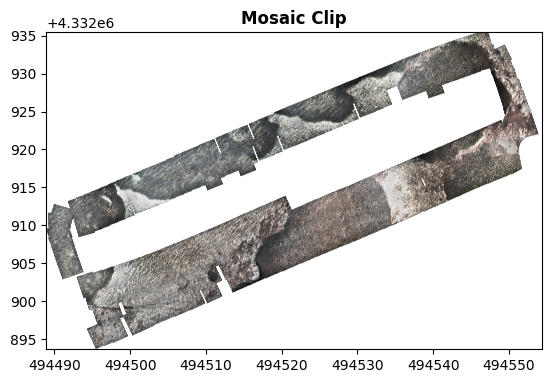

mosaic_clip shape: (4, 6948, 10757)


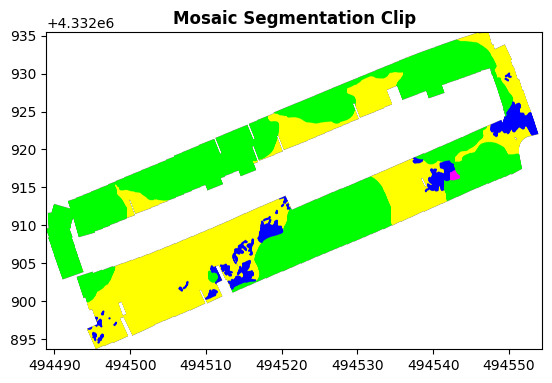

mosaic_seg_clip shape: (4, 6948, 10757)


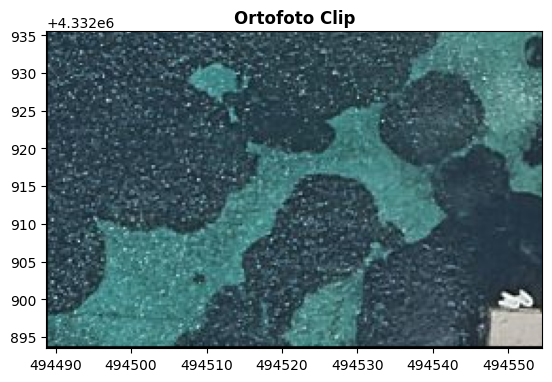

ortofoto_clip shape: (3, 168, 263)


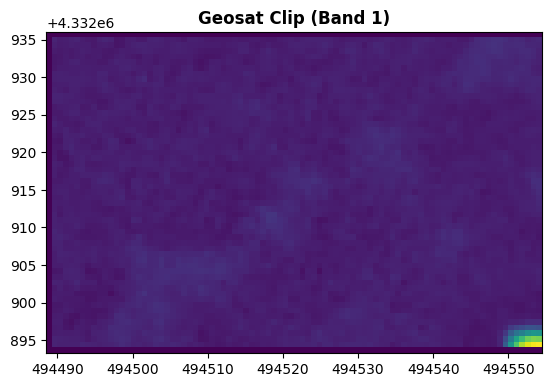

geosat_clip shape: (4, 57, 88)


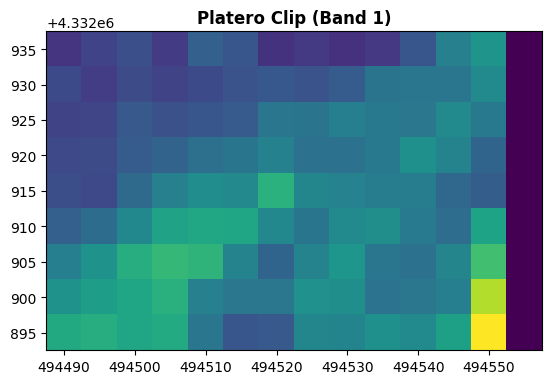

platero_clip shape: (7, 9, 14)


In [4]:
## CLIP ##

from shapely.geometry import box
from rasterio.mask import mask
import rasterio.plot

# 1️⃣ Create a polygon of the mosaic bounds
mosaic_bounds_geom = [box(*mosaic_tif.bounds)]  # list of one polygon

# 2️⃣ Define a helper function to clip any raster
def clip_raster(src_tif, bounds_geom):
    """Clip a raster to the given bounds geometry"""
    clipped_data, clipped_transform = mask(src_tif, bounds_geom, crop=True)
    return clipped_data, clipped_transform

# 3️⃣ Clip all rasters
mosaic_clip, mosaic_clip_transform = clip_raster(mosaic_tif, mosaic_bounds_geom)
rasterio.plot.show(mosaic_clip, transform=mosaic_clip_transform, title="Mosaic Clip")
print("mosaic_clip shape:", mosaic_clip.shape)

mosaic_seg_clip, mosaic_seg_clip_transform = clip_raster(mosaic_seg_tif, mosaic_bounds_geom)
rasterio.plot.show(mosaic_seg_clip, transform=mosaic_seg_clip_transform, title="Mosaic Segmentation Clip")
print("mosaic_seg_clip shape:", mosaic_seg_clip.shape)

ortofoto_clip, ortofoto_clip_transform = clip_raster(ortofoto_tif, mosaic_bounds_geom)
rasterio.plot.show(ortofoto_clip, transform=ortofoto_clip_transform, title="Ortofoto Clip")
print("ortofoto_clip shape:", ortofoto_clip.shape)

geosat_clip, geosat_clip_transform = clip_raster(geosat_tif, mosaic_bounds_geom)
rasterio.plot.show(geosat_clip[0], transform=geosat_clip_transform, title="Geosat Clip (Band 1)")
print("geosat_clip shape:", geosat_clip.shape)

platero_clip, platero_clip_transform = clip_raster(platero_tif, mosaic_bounds_geom)
rasterio.plot.show(platero_clip[0], transform=platero_clip_transform, title="Platero Clip (Band 1)")
print("platero_clip shape:", platero_clip.shape)

Target grid:
  Transform: | 0.25, 0.00, 494488.75|
| 0.00,-0.25, 4332935.50|
| 0.00, 0.00, 1.00|
  Width, Height: 263 168
  CRS: EPSG:25831
Mosaic Resampled - shape: (4, 168, 263)


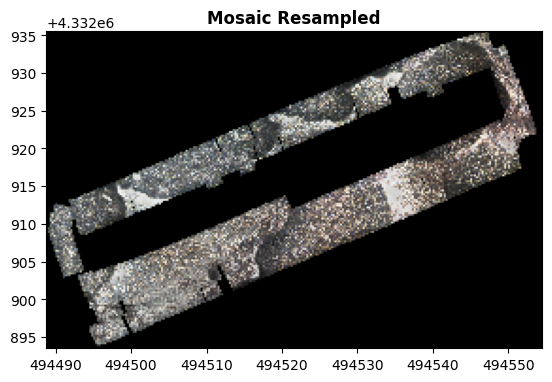

Mosaic Segmentation Resampled - shape: (4, 168, 263)


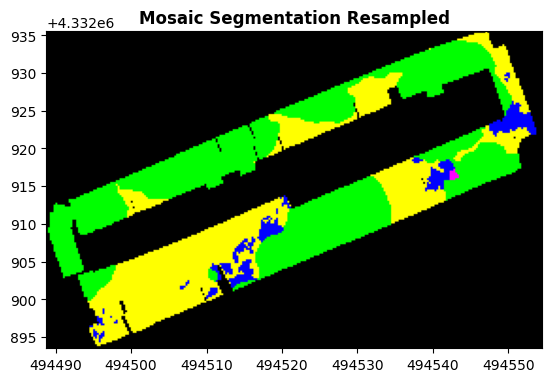

Ortofoto Resampled - shape: (3, 168, 263)


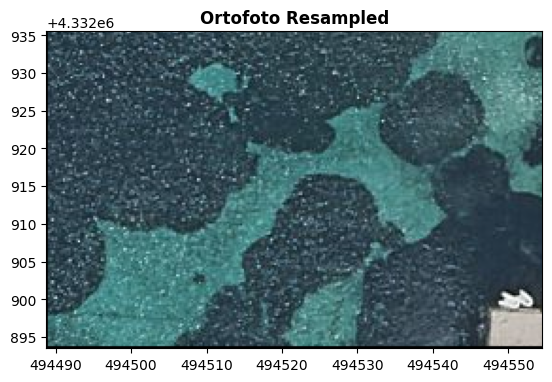

Geosat Resampled - shape: (4, 168, 263)


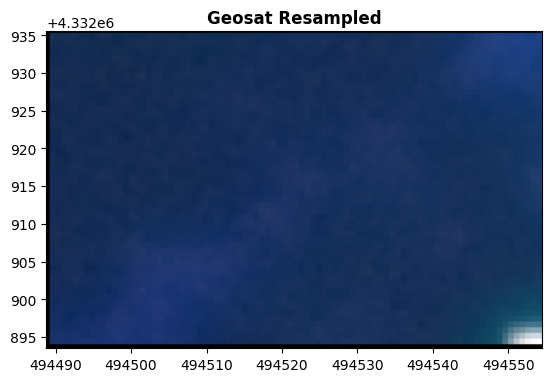

Platero Resampled - shape: (7, 168, 263)


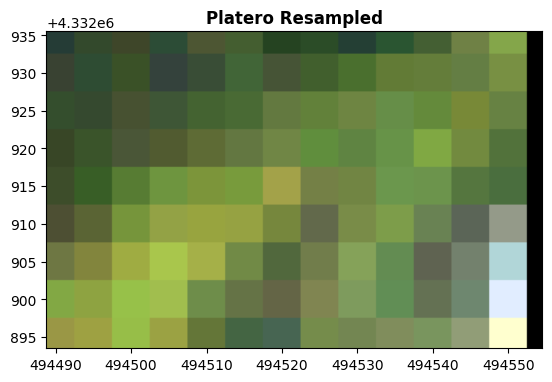


--- Shape check (all should match) ---
Mosaic: (4, 168, 263)
Mosaic Seg: (4, 168, 263)
Ortofoto: (3, 168, 263)
Geosat: (4, 168, 263)
Platero: (7, 168, 263)


In [5]:
## RESAMPLE ##

import rasterio
from rasterio.warp import reproject, Resampling
import rasterio.plot
import numpy as np
import math
from rasterio.transform import from_origin, array_bounds

# --- Function to compute target grid (not used but handy for debugging) ---
def compute_target_grid(clipped_shape, clipped_transform, target_res):
    h, w = clipped_shape[1], clipped_shape[2]
    left, bottom, right, top = array_bounds(h, w, clipped_transform)
    res_x, res_y = target_res
    width = math.ceil((right - left) / res_x)
    height = math.ceil((top - bottom) / abs(res_y))
    target_transform = from_origin(left, top, res_x, abs(res_y))
    return target_transform, width, height

# --- Resample function ---
def resample_clipped(src_array, src_transform, src_crs,
                     target_transform, target_crs,
                     target_height, target_width,
                     resampling=Resampling.nearest):
    dst = np.empty((src_array.shape[0], target_height, target_width), dtype=src_array.dtype)
    reproject(
        source=src_array,
        destination=dst,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=target_transform,
        dst_crs=target_crs,
        resampling=resampling,
        src_nodata=None,
        dst_nodata=0
    )
    return dst

# --- Target ---
target = "ortofoto"

# Dynamically access variables based on target name
target_transform = globals()[f"{target}_clip_transform"]
target_crs = globals()[f"{target}_tif"].crs
target_width = globals()[f"{target}_clip"].shape[2]
target_height = globals()[f"{target}_clip"].shape[1]


print("Target grid:")
print("  Transform:", target_transform)
print("  Width, Height:", target_width, target_height)
print("  CRS:", target_crs)

# --- Resample all clipped rasters to target grid ---
mosaic_resampled = resample_clipped(
    mosaic_clip, mosaic_clip_transform, mosaic_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

mosaic_seg_resampled = resample_clipped(
    mosaic_seg_clip, mosaic_seg_clip_transform, mosaic_seg_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

ortofoto_resampled = resample_clipped(
    ortofoto_clip, ortofoto_clip_transform, ortofoto_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

platero_resampled = resample_clipped(
    platero_clip, platero_clip_transform, platero_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

geosat_resampled = resample_clipped(
    geosat_clip, geosat_clip_transform, geosat_tif.crs,
    target_transform, target_crs, target_height, target_width,
    resampling=Resampling.nearest)

# --- Plotting with scaling ---
def plot_raster_scaled(array, transform, title):
    bands, h, w = array.shape
    print(f"{title} - shape: {array.shape}")
    if bands >= 3:
        scaled = np.zeros_like(array, dtype=np.float32)
        for i in range(3):
            b = array[i].astype(np.float32)
            min_val, max_val = np.nanmin(b), np.nanmax(b)
            if max_val > min_val:
                scaled[i] = (b - min_val) / (max_val - min_val)
            else:
                scaled[i] = b
        rasterio.plot.show(scaled[[0, 1, 2]], transform=transform, title=title)
    else:
        b = array[0].astype(np.float32)
        min_val, max_val = np.nanmin(b), np.nanmax(b)
        if max_val > min_val:
            b_scaled = (b - min_val) / (max_val - min_val)
        else:
            b_scaled = b
        rasterio.plot.show(b_scaled, transform=transform, title=title)

# --- Plot all rasters ---
plot_raster_scaled(mosaic_resampled, target_transform, "Mosaic Resampled")
plot_raster_scaled(mosaic_seg_resampled, target_transform, "Mosaic Segmentation Resampled")
plot_raster_scaled(ortofoto_resampled, target_transform, "Ortofoto Resampled")
plot_raster_scaled(geosat_resampled, target_transform, "Geosat Resampled")
plot_raster_scaled(platero_resampled, target_transform, "Platero Resampled")

# --- Shape & consistency checks ---
print("\n--- Shape check (all should match) ---")
print("Mosaic:", mosaic_resampled.shape)
print("Mosaic Seg:", mosaic_seg_resampled.shape)
print("Ortofoto:", ortofoto_resampled.shape)
print("Geosat:", geosat_resampled.shape)
print("Platero:", platero_resampled.shape)


New shape with NDVI + 3 PCA layers: (8, 168, 263)
Normalized per-layer minimums:
 [ 0.          0.          0.          0.         -0.50497866 -0.0332116
 -0.00433608 -0.00175797]
Normalized per-layer maximums:
 [0.09684901 0.06161593 0.05279622 0.04632639 0.22916456 0.09277984
 0.05738523 0.00694689]
Number of unique values per layer:
 [538 431 613 432]
Number of unique values per layer:
 [ 538  431  613  432 4501 4785 4785 4785]


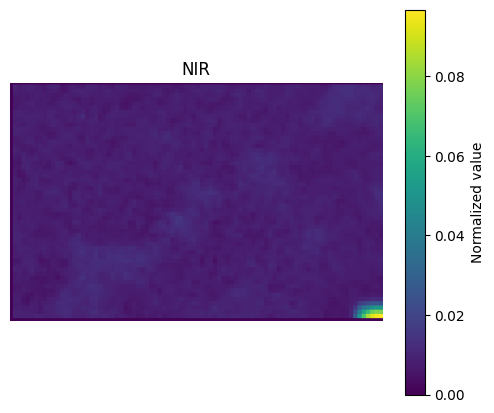

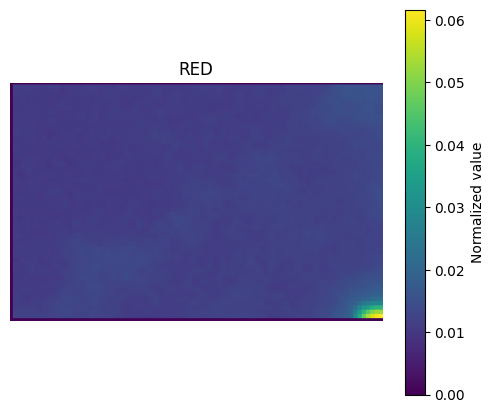

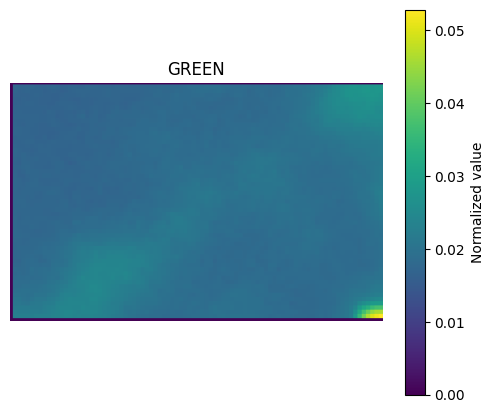

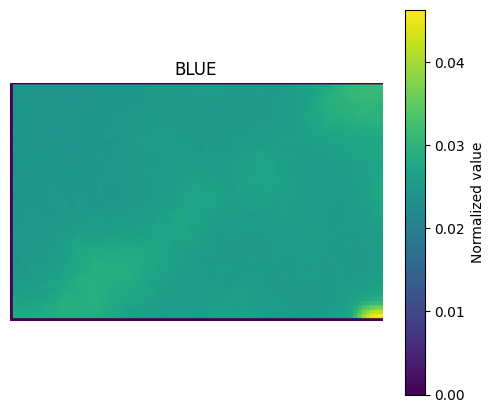

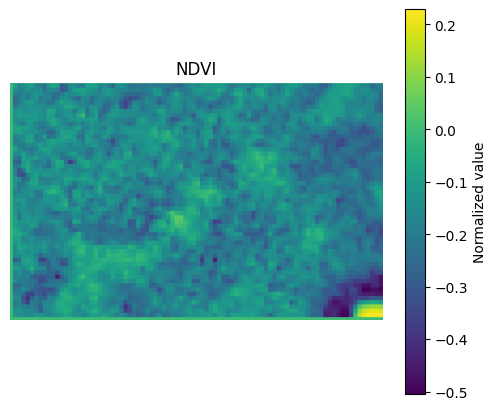

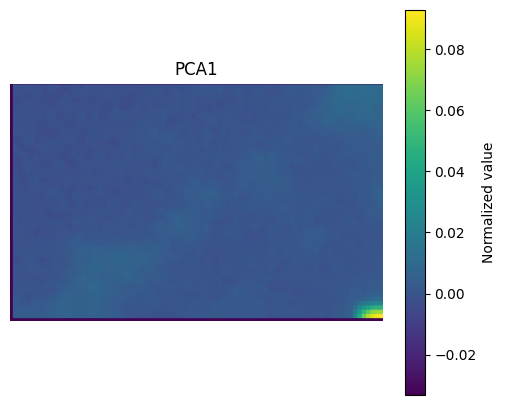

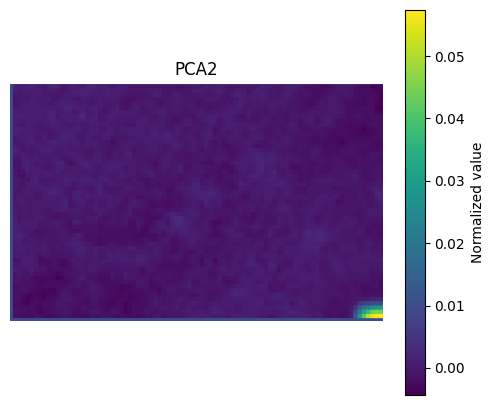

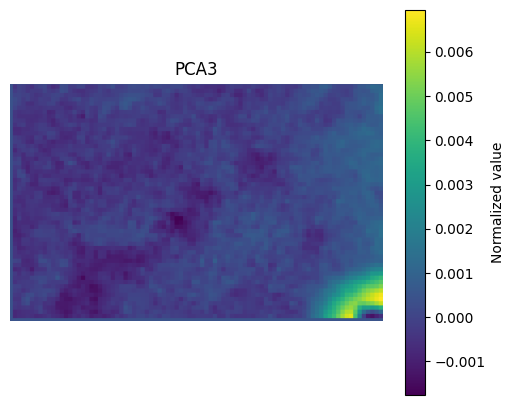

In [6]:
## LAYERS ON GEOSAT##

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np
from sklearn.decomposition import PCA

# --- 1. Load reference and target ---
ref = mosaic_seg_resampled

# --- 1. Normalize target_resampled using UInt16 full range ---
min_val = 0
max_val = 65535

target_resampled = geosat_resampled
target_resampled_normalized = (target_resampled - min_val) / (max_val - min_val + 1e-10)

# --- 2. Compute NDVI and append as new layer ---
ndvi = (target_resampled_normalized[0] - target_resampled_normalized[1]) / \
       (target_resampled_normalized[0] + target_resampled_normalized[1] + 1e-10)
ndvi = np.expand_dims(ndvi, axis=0)
# target_resampled_normalized = np.concatenate((target_resampled_normalized, ndvi), axis=0)

# --- 3. Prepare data for PCA (layers x height x width → pixels x features) ---
layers, H, W = target_resampled_normalized.shape
X = target_resampled_normalized.reshape(layers, -1).T  # shape: (H*W, layers)

# --- 4. Apply PCA (3 components) ---
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)  # shape: (H*W, 3)

# --- 5. Reshape PCA components back to 2D layers ---
pca_layers = X_pca.T.reshape(n_components, H, W)  # shape: (3, H, W)

# --- 6. Append PCA layers to the normalized array ---
pca1 = np.expand_dims(pca_layers[0], axis=0)
pca2 = np.expand_dims(pca_layers[1], axis=0)
pca3 = np.expand_dims(pca_layers[2], axis=0)

target_resampled_normalized = np.concatenate((target_resampled_normalized, ndvi, pca1, pca2, pca3),axis=0)

print("New shape with NDVI + 3 PCA layers:", target_resampled_normalized.shape)

norm_min = target_resampled_normalized.min(axis=(1, 2), keepdims=True)
norm_max = target_resampled_normalized.max(axis=(1, 2), keepdims=True)
print("Normalized per-layer minimums:\n", norm_min.squeeze())
print("Normalized per-layer maximums:\n", norm_max.squeeze())

# Count unique values per layer
unique_counts = np.array([np.unique(layer).size for layer in target_resampled])
print("Number of unique values per layer:\n", unique_counts)
unique_counts = np.array([np.unique(layer).size for layer in target_resampled_normalized])
print("Number of unique values per layer:\n", unique_counts)

import matplotlib.pyplot as plt

layers, H, W = target_resampled_normalized.shape

# Optional: create layer names for clarity
layer_names = ['NIR','RED','GREEN','BLUE','NDVI', 'PCA1', 'PCA2', 'PCA3']

for i in range(layers):
    plt.figure(figsize=(6, 5))
    plt.imshow(target_resampled_normalized[i], cmap='viridis')  # you can change colormap
    plt.title(layer_names[i] if i < len(layer_names) else f'Layer {i+1}')
    plt.colorbar(label='Normalized value')
    plt.axis('off')
    plt.show()


Processing combinations: 100%|██████████| 255/255 [07:40<00:00,  1.81s/it]



=== Best combination ===
Bands: ['Red', 'Green', 'Blue', 'NDVI', 'PCA1', 'PCA2', 'PCA3']
Eval Accuracy: 0.9087

=== Retraining Completed ===
Using bands: Red, Green, Blue, NDVI, PCA1, PCA2, PCA3


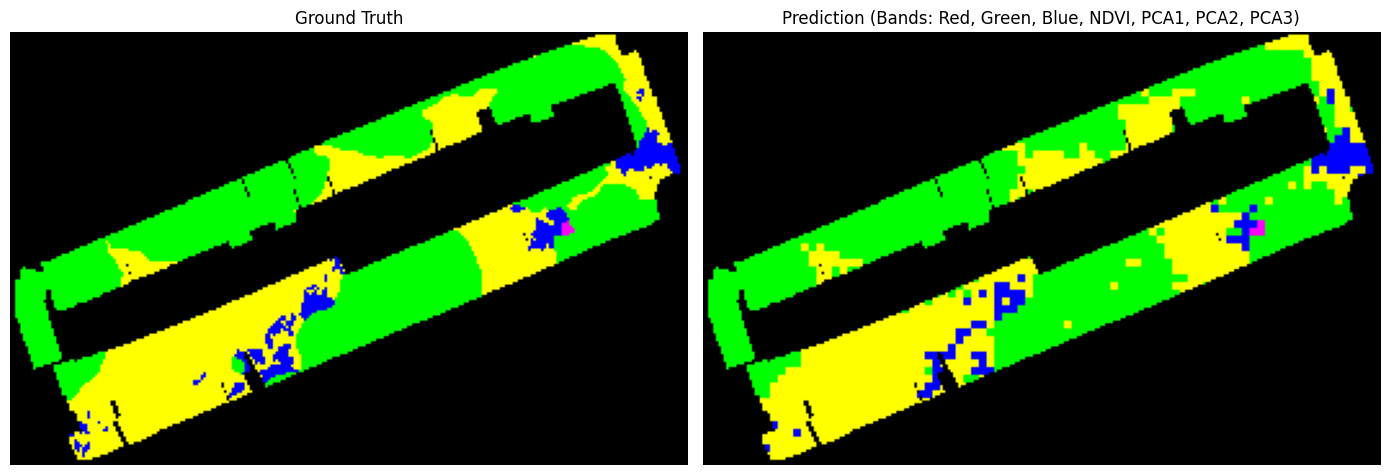

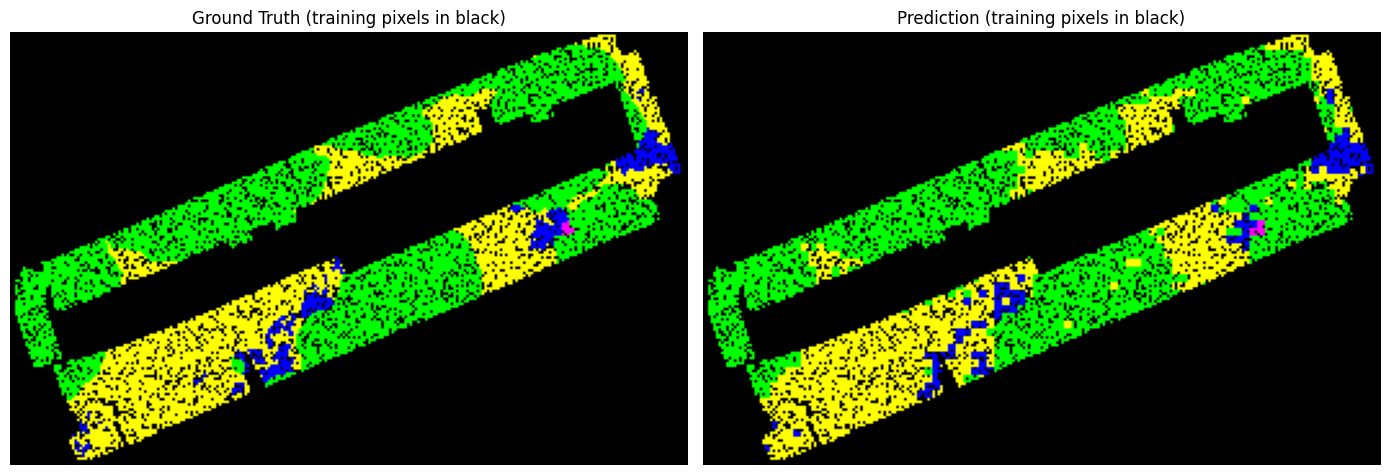

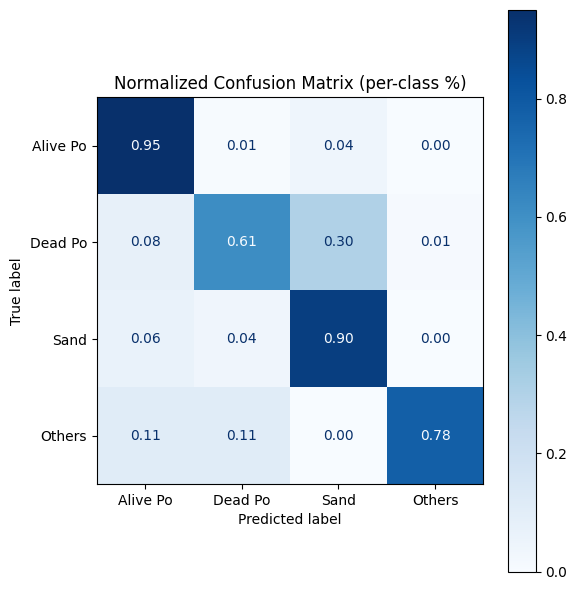


=== Classification Report (excluding training pixels) ===
              precision    recall  f1-score   support

    Alive Po      0.945     0.950     0.948      5918
     Dead Po      0.659     0.609     0.633       637
        Sand      0.894     0.897     0.895      4272
      Others      0.583     0.778     0.667        18

    accuracy                          0.909     10845
   macro avg      0.770     0.808     0.786     10845
weighted avg      0.908     0.909     0.908     10845

Overall Eval Accuracy (non-training pixels): 0.9087


In [7]:
## FOREST ON GEOSAT##
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pandas as pd
from tqdm import tqdm
#from tqdm.notebook import tqdm  # Colab-friendly progress bar

# -----------------------------
# 0. Select classes and layers
# -----------------------------
class_names = ["Alive Po", "Dead Po", "Rocks", "Sand"]
selected_class_names = ["Alive Po", "Dead Po", "Sand"]

layer_names = ["NIR", "Red", "Green", "Blue", "NDVI", "PCA1", "PCA2", "PCA3"]

train_pct = 0.2  # fraction of valid pixels for training

# -----------------------------
# 1. Pre-mask ref and target
# -----------------------------
alpha_mask = ref[3] > 0
target_rgb = target_resampled_normalized[[1, 2, 3]]
target_not_black = np.any(target_rgb > 0, axis=0)
combined_mask = alpha_mask & target_not_black

ref_masked = np.zeros_like(ref)
target_masked = np.zeros_like(target_resampled_normalized)
for i in range(ref.shape[0]):
    ref_masked[i] = ref[i] * combined_mask
for i in range(target_resampled_normalized.shape[0]):
    target_masked[i] = target_resampled_normalized[i] * combined_mask

# -----------------------------
# 2. Map RGB to numeric classes
# -----------------------------
class_name_to_rgb = {
    "Alive Po": [(0, 255, 0)],
    "Dead Po": [(0, 0, 255)],
    "Rocks": [(255, 0, 0)],
    "Sand": [(255, 255, 0)],
    "Others": [(255, 0, 255)]
}

others_class_index = len(selected_class_names)
labels = np.full(ref.shape[1:], -1, dtype=int)

for name, rgb_list in class_name_to_rgb.items():
    mask_total = np.zeros(ref.shape[1:], dtype=bool)
    for rgb in rgb_list:
        mask = (
            (ref_masked[0] == rgb[0]) &
            (ref_masked[1] == rgb[1]) &
            (ref_masked[2] == rgb[2])
        )
        mask_total |= mask
    if name in selected_class_names:
        labels[mask_total] = selected_class_names.index(name)
    else:
        labels[mask_total] = others_class_index

background_mask = ref[3] == 0
valid_pixels = combined_mask & (~background_mask) & (labels >= 0)

# ------------------------------------------
# 3. Generate all band combinations
# ------------------------------------------
all_combinations = [list(combo)
                    for r in range(1, len(layer_names) + 1)
                    for combo in itertools.combinations(layer_names, r)]

results = []

# ------------------------------------------
# 4. Loop through each band combination with tqdm
# ------------------------------------------
for selected_layer_names in tqdm(all_combinations, desc="Processing combinations"):
    try:
        # Prepare features
        selected_layers = [layer_names.index(name) for name in selected_layer_names]
        X_full = target_masked[selected_layers].reshape(len(selected_layers), -1).T
        y = labels.flatten()

        # Training subsample
        valid_indices = np.where(valid_pixels.flatten())[0]
        n_train = int(len(valid_indices) * train_pct)
        np.random.seed(42)
        selected_indices = np.random.choice(valid_indices, size=n_train, replace=False)

        X_train_sub = X_full[selected_indices]
        y_train_sub = y[selected_indices]

        # Random Forest training
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=20,
            random_state=42,
            n_jobs=-1,
            oob_score=True
        )
        rf.fit(X_train_sub, y_train_sub)

        # Predict all pixels
        y_pred = rf.predict(X_full)
        pred_map = y_pred.reshape(ref.shape[1:])
        pred_map_masked = np.full_like(pred_map, -1)
        pred_map_masked[combined_mask] = pred_map[combined_mask]

        # Evaluation excluding training pixels
        H, W = ref.shape[1:]
        train_mask = np.zeros_like(combined_mask.flatten(), dtype=bool)
        train_mask[selected_indices] = True
        eval_mask = combined_mask.flatten() & (~train_mask)

        y_true_eval = labels.flatten()[eval_mask]
        y_pred_eval = pred_map_masked.flatten()[eval_mask]

        accuracy_eval = np.mean(y_true_eval == y_pred_eval)
        oob_acc = rf.oob_score_

        results.append({
            "Bands": selected_layer_names,
            "NumBands": len(selected_layer_names),
            "OOB_Accuracy": oob_acc,
            "Eval_Accuracy": accuracy_eval
        })

    except Exception as e:
        print(f"Error with {selected_layer_names}: {e}")
        continue

results_df = pd.DataFrame(results)
results_df.sort_values(by="Eval_Accuracy", ascending=False, inplace=True)

best_row = results_df.iloc[0]
best_bands = best_row["Bands"]
print("\n=== Best combination ===")
print(f"Bands: {best_bands}")
print(f"Eval Accuracy: {best_row['Eval_Accuracy']:.4f}")

# ------------------------------------------
# 6. Retrain with Best Combination
# ------------------------------------------

selected_layer_names = best_bands
selected_layers = [layer_names.index(name) for name in selected_layer_names]



X_full = target_masked[selected_layers].reshape(len(selected_layers), -1).T
y = labels.flatten()

valid_indices = np.where(valid_pixels.flatten())[0]
n_train = int(len(valid_indices) * train_pct)
np.random.seed(42)
selected_indices = np.random.choice(valid_indices, size=n_train, replace=False)

X_train_sub = X_full[selected_indices]
y_train_sub = y[selected_indices]

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1,
    oob_score=True
)
rf.fit(X_train_sub, y_train_sub)

# Predict all pixels
y_pred = rf.predict(X_full)
pred_map = y_pred.reshape(ref.shape[1:])
pred_map_masked = np.full_like(pred_map, -1)
pred_map_masked[combined_mask] = pred_map[combined_mask]

print("\n=== Retraining Completed ===")
print(f"Using bands: {', '.join(selected_layer_names)}")

# ------------------------------------------
# 7. Visualization and Evaluation (excluding training pixels)
# ------------------------------------------

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

H, W = ref.shape[1:]
rgb_pred = np.zeros((H, W, 3))
rgb_gt = np.zeros((H, W, 3))

# Assign visualization colors (first color per class)
class_colors = {}
for i, name in enumerate(selected_class_names):
    rgb_255 = class_name_to_rgb[name][0]   # use only first color for display
    class_colors[i] = tuple(np.array(rgb_255) / 255.0)
rgb_255 = class_name_to_rgb["Others"][0]
class_colors[len(selected_class_names)] = tuple(np.array(rgb_255) / 255.0)

# Apply colors to GT and Prediction
for cls, color in class_colors.items():
    rgb_pred[pred_map_masked == cls] = color
    rgb_gt[labels == cls] = color

# Identify training pixels
train_mask = np.zeros_like(combined_mask.flatten(), dtype=bool)
train_mask[selected_indices] = True
train_mask = train_mask.reshape(H, W)

# Create GT and Prediction maps with black overlay for training pixels
rgb_pred_black = rgb_pred.copy()
rgb_gt_black = rgb_gt.copy()
rgb_pred_black[train_mask] = [0, 0, 0]
rgb_gt_black[train_mask] = [0, 0, 0]

# --- Evaluation metrics excluding training pixels ---
eval_mask = combined_mask.flatten() & (~train_mask.flatten())
y_true_eval = labels.flatten()[eval_mask]
y_pred_eval = pred_map_masked.flatten()[eval_mask]

# Remove invalid labels (-1)
valid_mask = (y_true_eval >= 0) & (y_pred_eval >= 0)
y_true_eval = y_true_eval[valid_mask]
y_pred_eval = y_pred_eval[valid_mask]

# Determine unique class indices present
unique_classes = np.unique(np.concatenate([y_true_eval, y_pred_eval]))

# Map class indices to readable names
target_names = [selected_class_names[i] if i < len(selected_class_names) else "Others"
                for i in unique_classes]

# --- Compute normalized confusion matrix and classification report ---
cm = confusion_matrix(y_true_eval, y_pred_eval,
                      labels=unique_classes,
                      normalize="true")  # rows normalized to 1.0

report = classification_report(
    y_true_eval,
    y_pred_eval,
    labels=unique_classes,
    target_names=target_names,
    digits=3
)

# --- Plot 1: GT vs Prediction (clean) ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb_gt)
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_pred)
plt.title(f"Prediction (Bands: {', '.join(best_bands)})")
plt.axis("off")

plt.tight_layout()
plt.show()

# --- Plot 2: GT vs Prediction (training pixels in black) ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb_gt_black)
plt.title("Ground Truth (training pixels in black)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_pred_black)
plt.title("Prediction (training pixels in black)")
plt.axis("off")

plt.tight_layout()
plt.show()

# --- Plot 3: Normalized Confusion Matrix ---
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues", ax=plt.gca(), colorbar=True, values_format=".2f")
plt.title("Normalized Confusion Matrix (per-class %)")
plt.tight_layout()
plt.show()

# --- Print classification report and accuracies ---
print("\n=== Classification Report (excluding training pixels) ===")
print(report)
overall_eval_acc = np.mean(y_true_eval == y_pred_eval)
print(f"Overall Eval Accuracy (non-training pixels): {overall_eval_acc:.4f}")



New target shape after reordering to NIR, R, G, B: (4, 168, 263)
New target shape with NDVI + 3 PCA layers: (8, 168, 263)


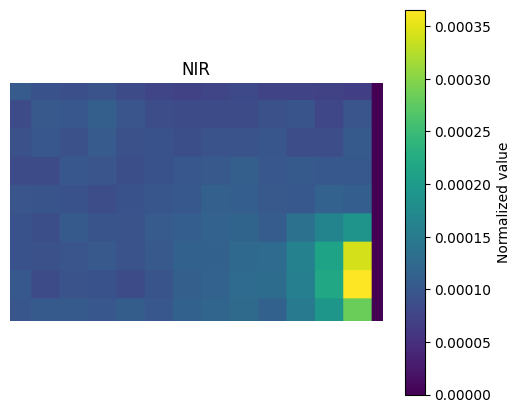

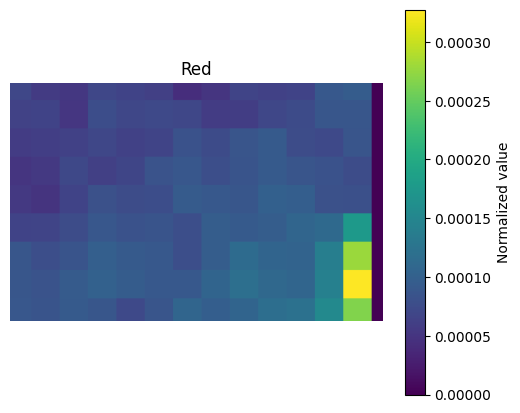

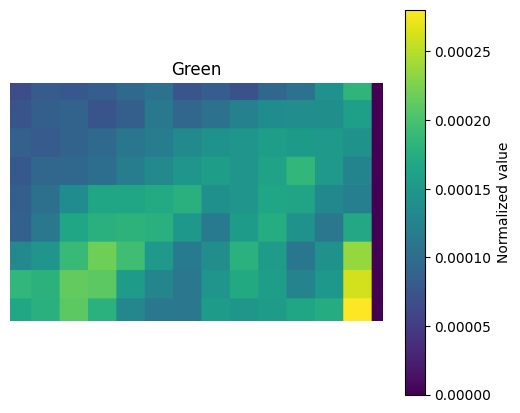

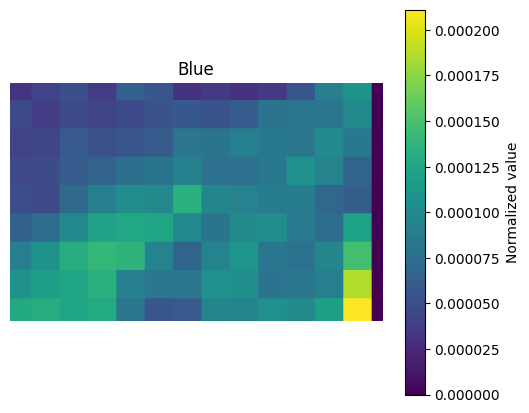

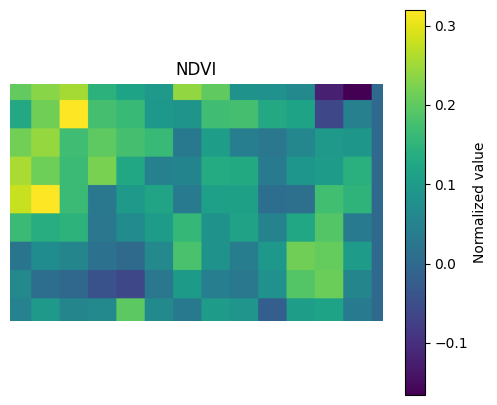

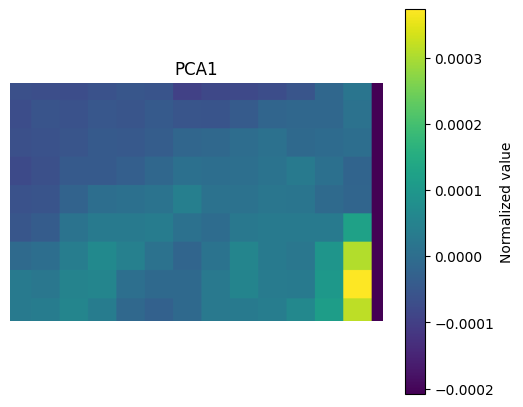

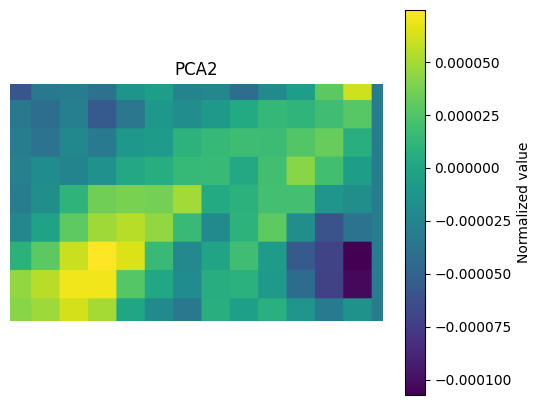

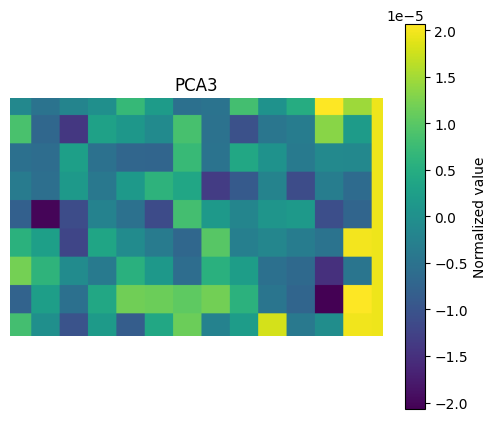

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


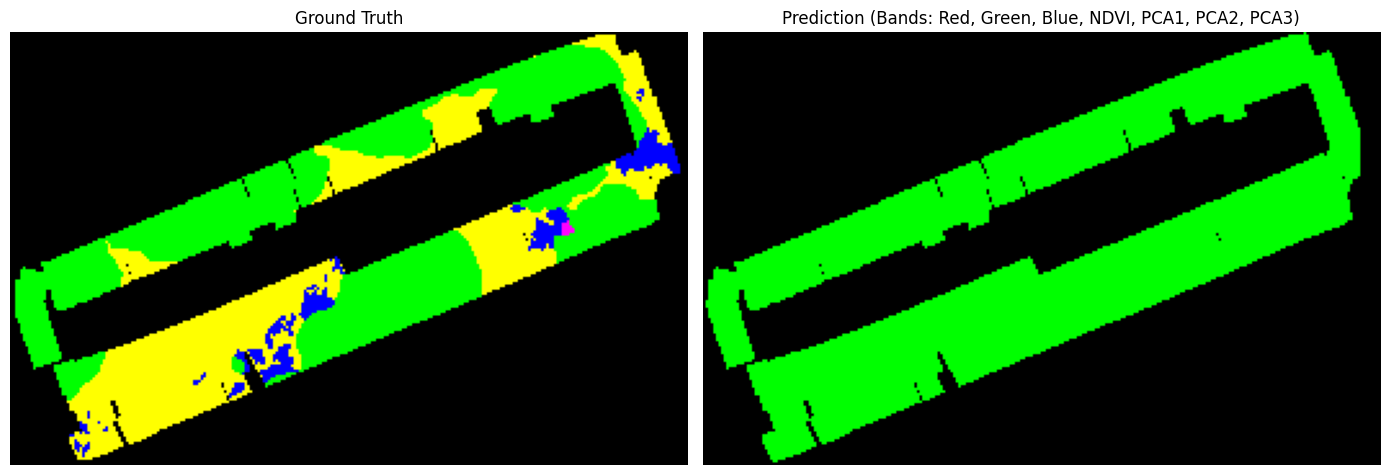

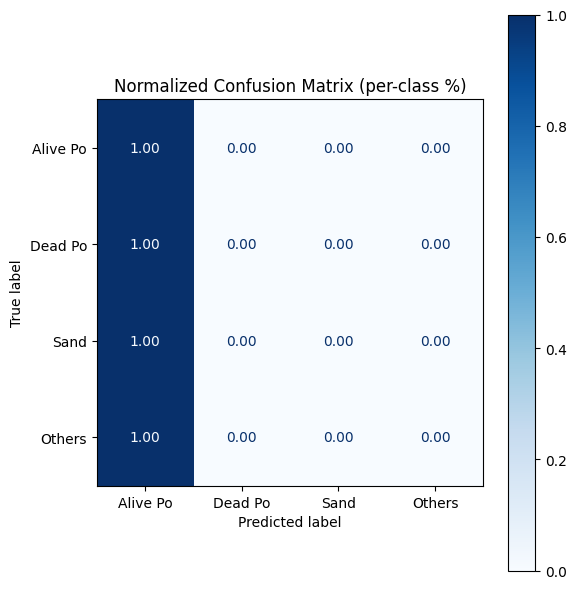


=== Classification Report (all valid pixels) ===
              precision    recall  f1-score   support

    Alive Po      0.550     1.000     0.709      7421
     Dead Po      0.000     0.000     0.000       736
        Sand      0.000     0.000     0.000      5327
      Others      0.000     0.000     0.000        21

    accuracy                          0.550     13505
   macro avg      0.137     0.250     0.177     13505
weighted avg      0.302     0.550     0.390     13505

Overall Accuracy (all valid pixels): 0.5495


In [8]:

## APPLY TRAINED TREE ##

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

new_target_resampled = platero_resampled

# --- Select and reorder layers: NIR, R, G, B ---
# Current indices: B=0, G=1, R=2, RE1=3, RE2=4, RE3=5, NIR=6
new_target_resampled = new_target_resampled[[6, 2, 1, 0]]
print("New target shape after reordering to NIR, R, G, B:", new_target_resampled.shape)

# --- Normalize new target ---
min_val = 0
max_val = 255
new_target_resampled_normalized = (new_target_resampled - min_val) / (max_val - min_val + 1e-10)

# --- Compute NDVI ---
ndvi_new = (new_target_resampled_normalized[0] - new_target_resampled_normalized[1]) / \
           (new_target_resampled_normalized[0] + new_target_resampled_normalized[1] + 1e-10)
ndvi_new = np.expand_dims(ndvi_new, axis=0)

# --- Prepare data for PCA ---
layers_new, H, W = new_target_resampled_normalized.shape
X_new = new_target_resampled_normalized.reshape(layers_new, -1).T  # shape: (H*W, layers)

# --- Apply PCA (3 components) ---
n_components = 3
pca_new = PCA(n_components=n_components)
X_pca_new = pca_new.fit_transform(X_new)

# --- Reshape PCA components back to 2D layers ---
pca_layers_new = X_pca_new.T.reshape(n_components, H, W)
pca1_new = np.expand_dims(pca_layers_new[0], axis=0)
pca2_new = np.expand_dims(pca_layers_new[1], axis=0)
pca3_new = np.expand_dims(pca_layers_new[2], axis=0)

# --- Concatenate NDVI and PCA layers ---
new_target_resampled_normalized = np.concatenate(
    (new_target_resampled_normalized, ndvi_new, pca1_new, pca2_new, pca3_new), axis=0
)
print("New target shape with NDVI + 3 PCA layers:", new_target_resampled_normalized.shape)

# --- Plot each layer ---
layer_names = ['NIR', 'Red', 'Green', 'Blue', 'NDVI', 'PCA1', 'PCA2', 'PCA3']
for i in range(new_target_resampled_normalized.shape[0]):
    plt.figure(figsize=(6, 5))
    plt.imshow(new_target_resampled_normalized[i], cmap='viridis')
    plt.title(layer_names[i] if i < len(layer_names) else f'Layer {i+1}')
    plt.colorbar(label='Normalized value')
    plt.axis('off')
    plt.show()

# --- Compute mask of valid pixels (exclude black pixels) ---
new_target_rgb = new_target_resampled_normalized[[1, 2, 3]]  # Red, Green, Blue layers
new_target_not_black = np.any(new_target_rgb > 0, axis=0)
new_combined_mask = alpha_mask & new_target_not_black  # reuse alpha_mask from reference

# --- Mask new target ---
new_target_masked = np.zeros_like(new_target_resampled_normalized)
for i in range(new_target_resampled_normalized.shape[0]):
    new_target_masked[i] = new_target_resampled_normalized[i] * new_combined_mask

# --- Prepare features for RF ---
selected_layers = [layer_names.index(name) for name in best_bands]
X_new_full = new_target_masked[selected_layers].reshape(len(selected_layers), -1).T

# --- Predict with trained RF ---
y_new_pred = rf.predict(X_new_full)
pred_new_map = y_new_pred.reshape(H, W)
pred_new_map_masked = np.full_like(pred_new_map, -1)
pred_new_map_masked[new_combined_mask] = pred_new_map[new_combined_mask]

# --- Prepare visualization ---
rgb_pred_new = np.zeros((H, W, 3))
rgb_gt_new = np.zeros((H, W, 3))
for cls, color in class_colors.items():
    rgb_pred_new[pred_new_map_masked == cls] = color
    rgb_gt_new[labels == cls] = color  # GT reference

# --- Evaluation metrics (all valid pixels) ---
eval_mask = new_combined_mask.flatten()
y_true_eval = labels.flatten()[eval_mask]
y_pred_eval = pred_new_map_masked.flatten()[eval_mask]

valid_mask = (y_true_eval >= 0) & (y_pred_eval >= 0)
y_true_eval = y_true_eval[valid_mask]
y_pred_eval = y_pred_eval[valid_mask]

unique_classes = np.unique(np.concatenate([y_true_eval, y_pred_eval]))
target_names = [selected_class_names[i] if i < len(selected_class_names) else "Others"
                for i in unique_classes]

cm = confusion_matrix(y_true_eval, y_pred_eval, labels=unique_classes, normalize="true")
report = classification_report(y_true_eval, y_pred_eval, labels=unique_classes,
                               target_names=target_names, digits=3)

# --- Plots ---
# GT vs Prediction
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb_gt_new)
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_pred_new)
plt.title(f"Prediction (Bands: {', '.join(best_bands)})")
plt.axis("off")
plt.tight_layout()
plt.show()

# Normalized Confusion Matrix
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues", ax=plt.gca(), colorbar=True, values_format=".2f")
plt.title("Normalized Confusion Matrix (per-class %)")
plt.tight_layout()
plt.show()

# --- 15. Print classification report ---
print("\n=== Classification Report (all valid pixels) ===")
print(report)
overall_acc = np.mean(y_true_eval == y_pred_eval)
print(f"Overall Accuracy (all valid pixels): {overall_acc:.4f}")


New shape with NDVI + 3 PCA layers: (11, 168, 263)
Normalized per-layer minimums:
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.6573165e-01
 -2.2755963e-04 -1.0223278e-04 -3.6714198e-05]
Normalized per-layer maximums:
 [3.6550889e-04 3.2765054e-04 2.8050473e-04 2.1115424e-04 2.4831065e-04
 2.2150949e-04 2.4573403e-04 3.1953943e-01 4.8639765e-04 9.9916462e-05
 3.3826269e-05]
Number of unique values per layer:
 [86 87 92 94 83 78 83]
Number of unique values per layer:
 [ 86  87  92  94  83  78  83 117 118 118 118]


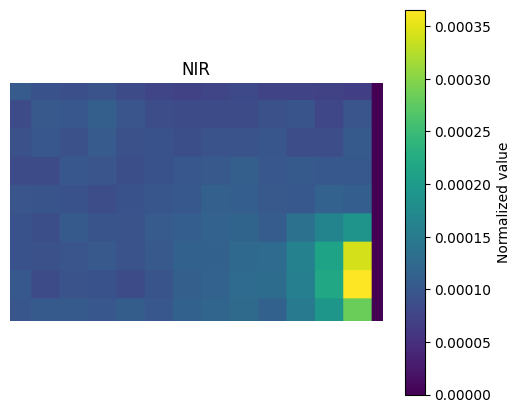

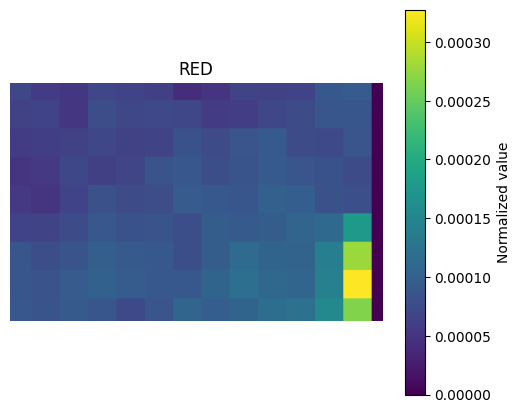

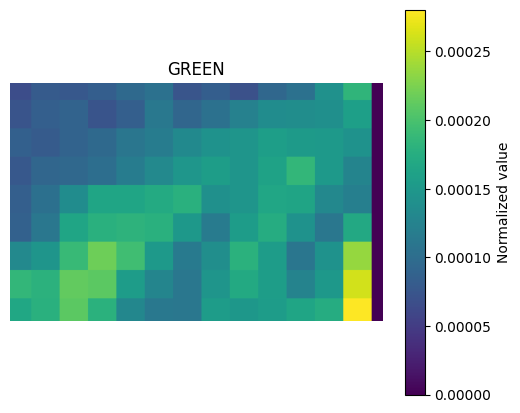

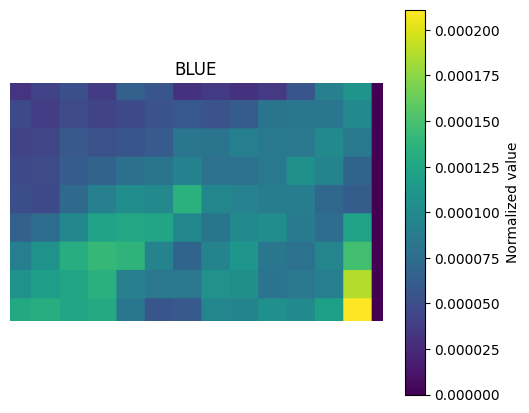

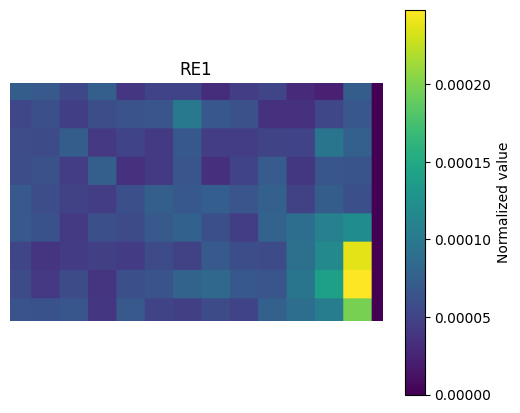

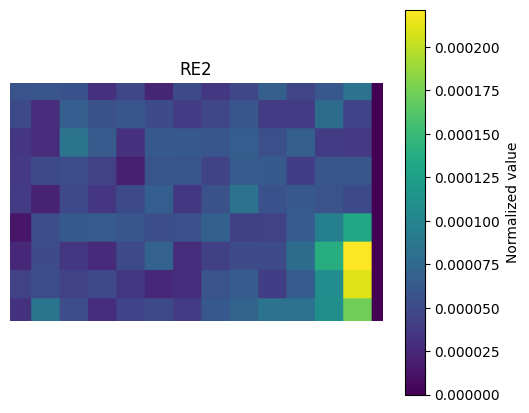

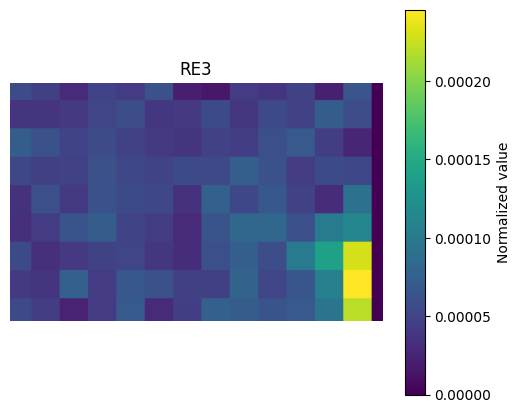

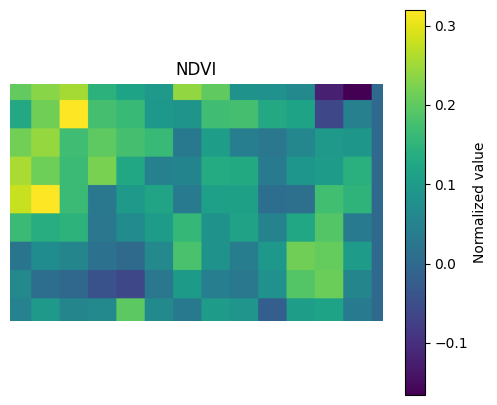

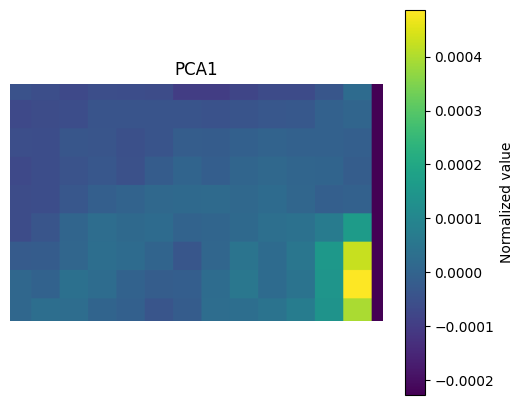

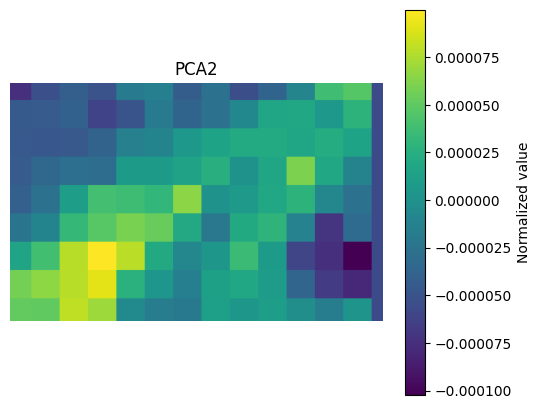

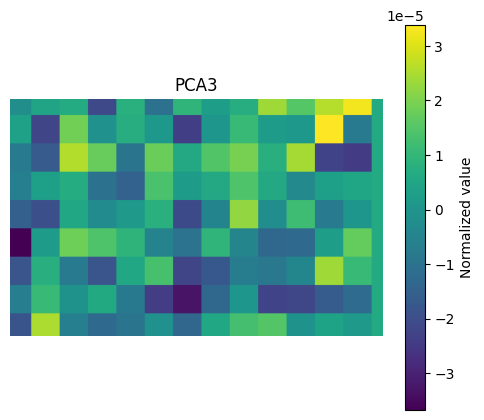

In [10]:
## LAYERS ON PLATERO##

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np
from sklearn.decomposition import PCA

# --- 1. Load reference and target ---
ref = mosaic_seg_resampled

# --- 1. Normalize target_resampled using UInt16 full range ---
min_val = 0
max_val = 255

target_resampled = platero_resampled # indices: B=0, G=1, R=2, RE1=3, RE2=4, RE3=5, NIR=6


target_resampled = target_resampled[[6, 2, 1, 0, 3, 4, 5]] # indices: NIR=0, R=1, G=2, B=3, RE1=4, RE2=5, RE3=6


target_resampled_normalized = (target_resampled - min_val) / (max_val - min_val + 1e-10)

# --- 2. Compute NDVI and append as new layer ---
ndvi = (target_resampled_normalized[0] - target_resampled_normalized[1]) / \
       (target_resampled_normalized[0] + target_resampled_normalized[1] + 1e-10)
ndvi = np.expand_dims(ndvi, axis=0)
# target_resampled_normalized = np.concatenate((target_resampled_normalized, ndvi), axis=0)

# --- 3. Prepare data for PCA (layers x height x width → pixels x features) ---
layers, H, W = target_resampled_normalized.shape
X = target_resampled_normalized.reshape(layers, -1).T  # shape: (H*W, layers)

# --- 4. Apply PCA (3 components) ---
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)  # shape: (H*W, 3)

# --- 5. Reshape PCA components back to 2D layers ---
pca_layers = X_pca.T.reshape(n_components, H, W)  # shape: (3, H, W)

# --- 6. Append PCA layers to the normalized array ---
pca1 = np.expand_dims(pca_layers[0], axis=0)
pca2 = np.expand_dims(pca_layers[1], axis=0)
pca3 = np.expand_dims(pca_layers[2], axis=0)

target_resampled_normalized = np.concatenate((target_resampled_normalized, ndvi, pca1, pca2, pca3),axis=0) # indices: NIR=0, R=1, G=2, B=3, RE1=4, RE2=5, RE3=6, NDVI=7, PCA1=8, PCA2=9, PCS3=10

print("New shape with NDVI + 3 PCA layers:", target_resampled_normalized.shape)

norm_min = target_resampled_normalized.min(axis=(1, 2), keepdims=True)
norm_max = target_resampled_normalized.max(axis=(1, 2), keepdims=True)
print("Normalized per-layer minimums:\n", norm_min.squeeze())
print("Normalized per-layer maximums:\n", norm_max.squeeze())

# Count unique values per layer
unique_counts = np.array([np.unique(layer).size for layer in target_resampled])
print("Number of unique values per layer:\n", unique_counts)
unique_counts = np.array([np.unique(layer).size for layer in target_resampled_normalized])
print("Number of unique values per layer:\n", unique_counts)

import matplotlib.pyplot as plt

layers, H, W = target_resampled_normalized.shape

# Optional: create layer names for clarity
layer_names = ['NIR','RED','GREEN','BLUE', 'RE1', 'RE2', 'RE3', 'NDVI', 'PCA1', 'PCA2', 'PCA3']

for i in range(layers):
    plt.figure(figsize=(6, 5))
    plt.imshow(target_resampled_normalized[i], cmap='viridis')  # you can change colormap
    plt.title(layer_names[i] if i < len(layer_names) else f'Layer {i+1}')
    plt.colorbar(label='Normalized value')
    plt.axis('off')
    plt.show()


Processing combinations: 100%|██████████| 2047/2047 [37:26<00:00,  1.10s/it]



=== Best combination ===
Bands: ['NDVI']
Eval Accuracy: 0.8201

=== Retraining Completed ===
Using bands: NDVI


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


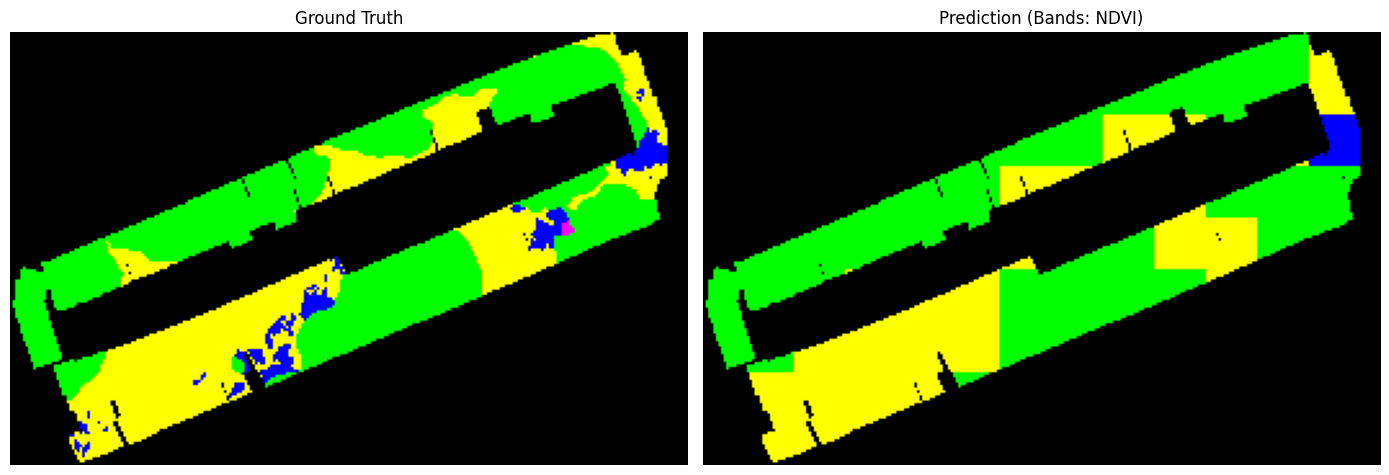

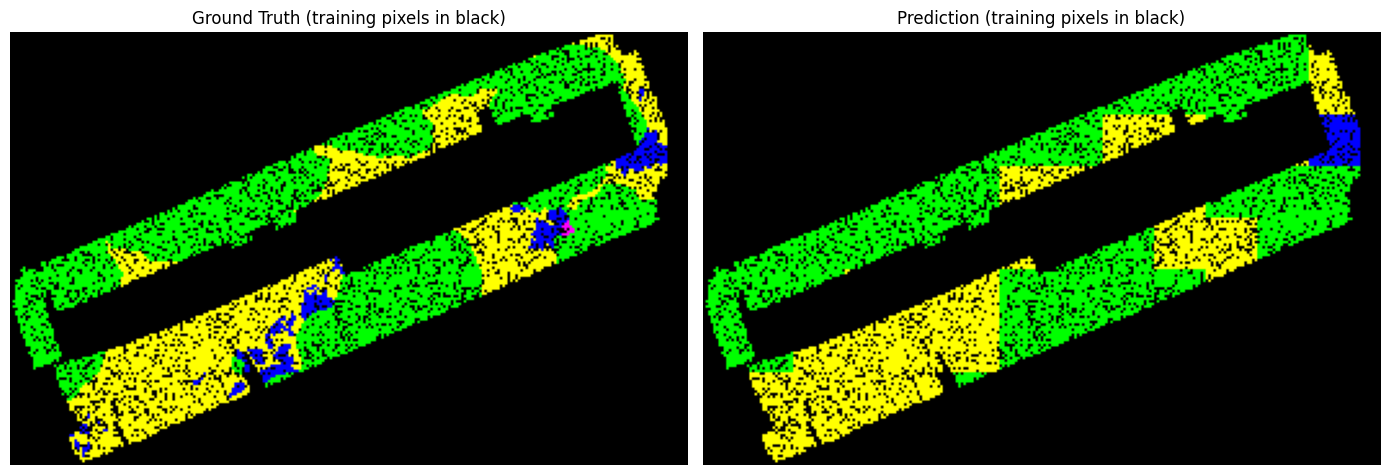

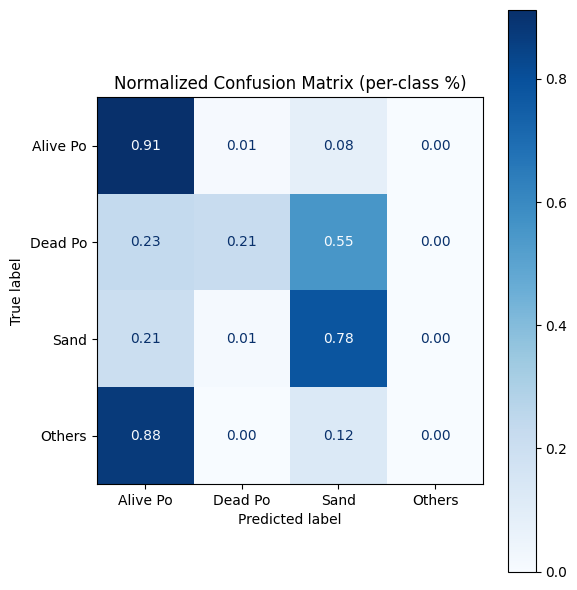


=== Classification Report (excluding training pixels) ===
              precision    recall  f1-score   support

    Alive Po      0.839     0.912     0.874      5907
     Dead Po      0.549     0.215     0.309       596
        Sand      0.806     0.781     0.793      4290
      Others      0.000     0.000     0.000        16

    accuracy                          0.820     10809
   macro avg      0.549     0.477     0.494     10809
weighted avg      0.809     0.820     0.809     10809

Overall Eval Accuracy (non-training pixels): 0.8201


In [11]:
## FOREST ON PLATERO##
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import pandas as pd
from tqdm import tqdm
#from tqdm.notebook import tqdm  # Colab-friendly progress bar

# -----------------------------
# 0. Select classes and layers
# -----------------------------
class_names = ["Alive Po", "Dead Po", "Rocks", "Sand"]
selected_class_names = ["Alive Po", "Dead Po", "Sand"]

layer_names = ['NIR','RED','GREEN','BLUE', 'RE1', 'RE2', 'RE3', 'NDVI', 'PCA1', 'PCA2', 'PCA3']

train_pct = 0.2  # fraction of valid pixels for training

# -----------------------------
# 1. Pre-mask ref and target
# -----------------------------
alpha_mask = ref[3] > 0
target_rgb = target_resampled_normalized[[1, 2, 3]]
target_not_black = np.any(target_rgb > 0, axis=0)
combined_mask = alpha_mask & target_not_black

ref_masked = np.zeros_like(ref)
target_masked = np.zeros_like(target_resampled_normalized)
for i in range(ref.shape[0]):
    ref_masked[i] = ref[i] * combined_mask
for i in range(target_resampled_normalized.shape[0]):
    target_masked[i] = target_resampled_normalized[i] * combined_mask

# -----------------------------
# 2. Map RGB to numeric classes
# -----------------------------
class_name_to_rgb = {
    "Alive Po": [(0, 255, 0)],
    "Dead Po": [(0, 0, 255)],
    "Rocks": [(255, 0, 0)],
    "Sand": [(255, 255, 0)],
    "Others": [(255, 0, 255)]
}

others_class_index = len(selected_class_names)
labels = np.full(ref.shape[1:], -1, dtype=int)

for name, rgb_list in class_name_to_rgb.items():
    mask_total = np.zeros(ref.shape[1:], dtype=bool)
    for rgb in rgb_list:
        mask = (
            (ref_masked[0] == rgb[0]) &
            (ref_masked[1] == rgb[1]) &
            (ref_masked[2] == rgb[2])
        )
        mask_total |= mask
    if name in selected_class_names:
        labels[mask_total] = selected_class_names.index(name)
    else:
        labels[mask_total] = others_class_index

background_mask = ref[3] == 0
valid_pixels = combined_mask & (~background_mask) & (labels >= 0)

# ------------------------------------------
# 3. Generate all band combinations
# ------------------------------------------
all_combinations = [list(combo)
                    for r in range(1, len(layer_names) + 1)
                    for combo in itertools.combinations(layer_names, r)]

results = []

# ------------------------------------------
# 4. Loop through each band combination with tqdm
# ------------------------------------------
for selected_layer_names in tqdm(all_combinations, desc="Processing combinations"):
    try:
        # Prepare features
        selected_layers = [layer_names.index(name) for name in selected_layer_names]
        X_full = target_masked[selected_layers].reshape(len(selected_layers), -1).T
        y = labels.flatten()

        # Training subsample
        valid_indices = np.where(valid_pixels.flatten())[0]
        n_train = int(len(valid_indices) * train_pct)
        np.random.seed(42)
        selected_indices = np.random.choice(valid_indices, size=n_train, replace=False)

        X_train_sub = X_full[selected_indices]
        y_train_sub = y[selected_indices]

        # Random Forest training
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=20,
            random_state=42,
            n_jobs=-1,
            oob_score=True
        )
        rf.fit(X_train_sub, y_train_sub)

        # Predict all pixels
        y_pred = rf.predict(X_full)
        pred_map = y_pred.reshape(ref.shape[1:])
        pred_map_masked = np.full_like(pred_map, -1)
        pred_map_masked[combined_mask] = pred_map[combined_mask]

        # Evaluation excluding training pixels
        H, W = ref.shape[1:]
        train_mask = np.zeros_like(combined_mask.flatten(), dtype=bool)
        train_mask[selected_indices] = True
        eval_mask = combined_mask.flatten() & (~train_mask)

        y_true_eval = labels.flatten()[eval_mask]
        y_pred_eval = pred_map_masked.flatten()[eval_mask]

        accuracy_eval = np.mean(y_true_eval == y_pred_eval)
        oob_acc = rf.oob_score_

        results.append({
            "Bands": selected_layer_names,
            "NumBands": len(selected_layer_names),
            "OOB_Accuracy": oob_acc,
            "Eval_Accuracy": accuracy_eval
        })

    except Exception as e:
        print(f"Error with {selected_layer_names}: {e}")
        continue

results_df = pd.DataFrame(results)
results_df.sort_values(by="Eval_Accuracy", ascending=False, inplace=True)

best_row = results_df.iloc[0]
best_bands = best_row["Bands"]
print("\n=== Best combination ===")
print(f"Bands: {best_bands}")
print(f"Eval Accuracy: {best_row['Eval_Accuracy']:.4f}")

# ------------------------------------------
# 6. Retrain with Best Combination
# ------------------------------------------

selected_layer_names = best_bands
selected_layers = [layer_names.index(name) for name in selected_layer_names]



X_full = target_masked[selected_layers].reshape(len(selected_layers), -1).T
y = labels.flatten()

valid_indices = np.where(valid_pixels.flatten())[0]
n_train = int(len(valid_indices) * train_pct)
np.random.seed(42)
selected_indices = np.random.choice(valid_indices, size=n_train, replace=False)

X_train_sub = X_full[selected_indices]
y_train_sub = y[selected_indices]

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1,
    oob_score=True
)
rf.fit(X_train_sub, y_train_sub)

# Predict all pixels
y_pred = rf.predict(X_full)
pred_map = y_pred.reshape(ref.shape[1:])
pred_map_masked = np.full_like(pred_map, -1)
pred_map_masked[combined_mask] = pred_map[combined_mask]

print("\n=== Retraining Completed ===")
print(f"Using bands: {', '.join(selected_layer_names)}")

# ------------------------------------------
# 7. Visualization and Evaluation (excluding training pixels)
# ------------------------------------------

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

H, W = ref.shape[1:]
rgb_pred = np.zeros((H, W, 3))
rgb_gt = np.zeros((H, W, 3))

# Assign visualization colors (first color per class)
class_colors = {}
for i, name in enumerate(selected_class_names):
    rgb_255 = class_name_to_rgb[name][0]   # use only first color for display
    class_colors[i] = tuple(np.array(rgb_255) / 255.0)
rgb_255 = class_name_to_rgb["Others"][0]
class_colors[len(selected_class_names)] = tuple(np.array(rgb_255) / 255.0)

# Apply colors to GT and Prediction
for cls, color in class_colors.items():
    rgb_pred[pred_map_masked == cls] = color
    rgb_gt[labels == cls] = color

# Identify training pixels
train_mask = np.zeros_like(combined_mask.flatten(), dtype=bool)
train_mask[selected_indices] = True
train_mask = train_mask.reshape(H, W)

# Create GT and Prediction maps with black overlay for training pixels
rgb_pred_black = rgb_pred.copy()
rgb_gt_black = rgb_gt.copy()
rgb_pred_black[train_mask] = [0, 0, 0]
rgb_gt_black[train_mask] = [0, 0, 0]

# --- Evaluation metrics excluding training pixels ---
eval_mask = combined_mask.flatten() & (~train_mask.flatten())
y_true_eval = labels.flatten()[eval_mask]
y_pred_eval = pred_map_masked.flatten()[eval_mask]

# Remove invalid labels (-1)
valid_mask = (y_true_eval >= 0) & (y_pred_eval >= 0)
y_true_eval = y_true_eval[valid_mask]
y_pred_eval = y_pred_eval[valid_mask]

# Determine unique class indices present
unique_classes = np.unique(np.concatenate([y_true_eval, y_pred_eval]))

# Map class indices to readable names
target_names = [selected_class_names[i] if i < len(selected_class_names) else "Others"
                for i in unique_classes]

# --- Compute normalized confusion matrix and classification report ---
cm = confusion_matrix(y_true_eval, y_pred_eval,
                      labels=unique_classes,
                      normalize="true")  # rows normalized to 1.0

report = classification_report(
    y_true_eval,
    y_pred_eval,
    labels=unique_classes,
    target_names=target_names,
    digits=3
)

# --- Plot 1: GT vs Prediction (clean) ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb_gt)
plt.title("Ground Truth")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_pred)
plt.title(f"Prediction (Bands: {', '.join(best_bands)})")
plt.axis("off")

plt.tight_layout()
plt.show()

# --- Plot 2: GT vs Prediction (training pixels in black) ---
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(rgb_gt_black)
plt.title("Ground Truth (training pixels in black)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_pred_black)
plt.title("Prediction (training pixels in black)")
plt.axis("off")

plt.tight_layout()
plt.show()

# --- Plot 3: Normalized Confusion Matrix ---
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues", ax=plt.gca(), colorbar=True, values_format=".2f")
plt.title("Normalized Confusion Matrix (per-class %)")
plt.tight_layout()
plt.show()

# --- Print classification report and accuracies ---
print("\n=== Classification Report (excluding training pixels) ===")
print(report)
overall_eval_acc = np.mean(y_true_eval == y_pred_eval)
print(f"Overall Eval Accuracy (non-training pixels): {overall_eval_acc:.4f}")

